In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import torch
import torch.nn as nn
import torchtext.data as ttd
from torchtext.vocab import GloVe

In [2]:
# Unfortunately this URL doesn't work directly with pd.read_csv
# !wget -nc https://lazyprogrammer.me/course_files/spam.csv

In [3]:
#error!
!head spam.csv

In [4]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
# drop unnecessary columns
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# rename columns to something better
df.columns = ['labels', 'data']

In [9]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# create binary labels
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})

In [11]:
df2 = df[['data', 'b_labels']]

In [12]:
df2.head()

,data,b_labels
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [13]:
df2.to_csv('spam2.csv', index=False)

In [14]:
TEXT = ttd.Field(
    sequential=True,
    batch_first=True,
    lower=False,
    # tokenize='spacy',
    pad_first=True)
LABEL = ttd.Field(sequential=False, use_vocab=False, is_target=True)

# Note: if you don't specify use_vocab=False, then PyTorch will
# complain later when you try to iterate over the dataset that
# the attribute `vocab` doesn't exist.

# Note 2: if you don't specify is_target=True, then PyTorch will
# assume it's part of the input, so when you iterate over the
# dataset it will be like:
# for (inputs, targets), _ in iterator:
# where the 2nd element (_) should have been the target.

dataset = ttd.TabularDataset(
    path='spam2.csv',
    format='csv',
    skip_header=True,
    fields=[('data', TEXT), ('label', LABEL)]
)

/Users/Z0094BV/miniconda3/lib/python3.9/site-packages/torchtext/data/field.py:150: UserWarning: Field class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.
  warnings.warn('{} class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.'.format(self.__class__.__name__), UserWarning)
/Users/Z0094BV/miniconda3/lib/python3.9/site-packages/torchtext/data/example.py:68: UserWarning: Example class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.
  warnings.warn('Example class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.', UserWarning)
/Users/Z0094BV/miniconda3/lib/python3.9/site-packages/torchtext/data/example.py:78: UserWarning: Example class will be retired soon and moved to torchtext.legacy. Please see the most recent 

In [15]:
train_dataset, test_dataset = dataset.split() # default is 0.7

In [16]:
TEXT.build_vocab(train_dataset,)

In [17]:
vocab = TEXT.vocab

In [18]:
vocab.stoi

defaultdict(<bound method Vocab._default_unk_index of <torchtext.vocab.Vocab object at 0x7f894a322a00>>,
            {'<unk>': 0,
             '<pad>': 1,
             'to': 2,
             'you': 3,
             'I': 4,
             'a': 5,
             'the': 6,
             'and': 7,
             'in': 8,
             'is': 9,
             'i': 10,
             'u': 11,
             'for': 12,
             'my': 13,
             'of': 14,
             'me': 15,
             'your': 16,
             'on': 17,
             'have': 18,
             'that': 19,
             '2': 20,
             'are': 21,
             'call': 22,
             'it': 23,
             'at': 24,
             'be': 25,
             'or': 26,
             'will': 27,
             'with': 28,
             'get': 29,
             'not': 30,
             'U': 31,
             "I'm": 32,
             'so': 33,
             '&lt;#&gt;': 34,
             'can': 35,
             'but': 36,
             'ur': 37,
  

In [19]:
vocab.itos

['<unk>',
 '<pad>',
 'to',
 'you',
 'I',
 'a',
 'the',
 'and',
 'in',
 'is',
 'i',
 'u',
 'for',
 'my',
 'of',
 'me',
 'your',
 'on',
 'have',
 'that',
 '2',
 'are',
 'call',
 'it',
 'at',
 'be',
 'or',
 'will',
 'with',
 'get',
 'not',
 'U',
 "I'm",
 'so',
 '&lt;#&gt;',
 'can',
 'but',
 'ur',
 'You',
 'up',
 '4',
 'when',
 'from',
 'go',
 'just',
 'know',
 'this',
 'do',
 'if',
 'all',
 'we',
 '.',
 '?',
 'out',
 'like',
 'got',
 '...',
 'come',
 'now',
 'was',
 'am',
 'Call',
 'want',
 'about',
 'send',
 'time',
 'by',
 'then',
 "I'll",
 'only',
 'going',
 'what',
 'as',
 'need',
 'n',
 'text',
 'Just',
 'one',
 'How',
 'our',
 'been',
 'its',
 'no',
 'But',
 'still',
 'If',
 'think',
 'We',
 'he',
 'see',
 'there',
 "don't",
 'good',
 'Do',
 'Your',
 'No',
 'So',
 'r',
 'any',
 'home',
 '&',
 'back',
 'has',
 'how',
 'some',
 'Ì_',
 'free',
 'an',
 'day',
 'tell',
 'dont',
 'take',
 'What',
 'love',
 'later',
 'Ok',
 'her',
 'The',
 'mobile',
 'A',
 'And',
 'me.',
 'FREE',
 'd',
 'm

In [20]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [21]:
train_iter, test_iter = ttd.Iterator.splits(
        (train_dataset, test_dataset), sort_key=lambda x: len(x.data),
        batch_sizes=(32, 256), device=device)

/Users/Z0094BV/miniconda3/lib/python3.9/site-packages/torchtext/data/iterator.py:48: UserWarning: Iterator class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.
  warnings.warn('{} class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.'.format(self.__class__.__name__), UserWarning)


In [22]:
for inputs, targets in train_iter:
  print("inputs:", inputs, "shape:", inputs.shape)
  print("targets:", targets, "shape:", targets.shape)
  break

inputs: tensor([[    1,     1,     1,  ...,   415,     3,   442],
        [    1,     1,     1,  ...,     3,   195,  1331],
        [    1,     1,     1,  ...,   552,   316,   212],
        ...,
        [    1,     1,     1,  ...,   843,  2191,  1188],
        [    1,     1,     1,  ...,   337,   856, 11289],
        [    1,     1,     1,  ...,    68,    75,     3]]) shape: torch.Size([32, 49])
targets: tensor([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0]) shape: torch.Size([32])


/Users/Z0094BV/miniconda3/lib/python3.9/site-packages/torchtext/data/batch.py:23: UserWarning: Batch class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.
  warnings.warn('{} class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.'.format(self.__class__.__name__), UserWarning)


In [23]:
for inputs, targets in test_iter:
  print("inputs:", inputs)
  print("targets:", targets)
  break

inputs: tensor([[   4,   69,  558,    0,  275,    0],
        [   0, 1129,  198,    0, 1032,    0],
        [ 132,    3,  648,  197, 2086,  207],
        ...,
        [   1,    1,    1,    1,    1,    0],
        [   1,    1,    1,    1,    1,  456],
        [   1,    1,    1,    1,    1,  115]])
targets: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [24]:
# Define the model
class RNN(nn.Module):
  def __init__(self, n_vocab, embed_dim, n_hidden, n_rnnlayers, n_outputs):
    super(RNN, self).__init__()
    self.V = n_vocab
    self.D = embed_dim
    self.M = n_hidden
    self.K = n_outputs
    self.L = n_rnnlayers

    self.embed = nn.Embedding(self.V, self.D)
    self.rnn = nn.LSTM(
        input_size=self.D,
        hidden_size=self.M,
        num_layers=self.L,
        batch_first=True)
    self.fc = nn.Linear(self.M, self.K)
  
  def forward(self, X):
    # initial hidden states
    h0 = torch.zeros(self.L, X.size(0), self.M).to(device)
    c0 = torch.zeros(self.L, X.size(0), self.M).to(device)

    # embedding layer
    # turns word indexes into word vectors
    out = self.embed(X)

    # get RNN unit output
    out, _ = self.rnn(out, (h0, c0))

    # max pool
    out, _ = torch.max(out, 1)

    # we only want h(T) at the final time step
    out = self.fc(out)
    return out

In [25]:
model = RNN(len(vocab), 20, 15, 1, 1)
#model.to(device)

In [26]:
# Loss and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters())

In [27]:
# A function to encapsulate the training loop
def batch_gd(model, criterion, optimizer, train_iter, test_iter, epochs):
  train_losses = np.zeros(epochs)
  test_losses = np.zeros(epochs)

  for it in range(epochs):
    t0 = datetime.now()
    train_loss = []
    for inputs, targets in train_iter:
      # print("inputs.shape:", inputs.shape, "targets.shape:", targets.shape)
      targets = targets.view(-1, 1).float()
      # move data to GPU
      # inputs, targets = inputs.to(device), targets.to(device)

      # zero the parameter gradients
      optimizer.zero_grad()

      # Forward pass
      outputs = model(inputs)
      loss = criterion(outputs, targets)
        
      # Backward and optimize
      loss.backward()
      optimizer.step()

      train_loss.append(loss.item())

    # Get train loss and test loss
    train_loss = np.mean(train_loss) # a little misleading
    
    test_loss = []
    for inputs, targets in test_iter:
      # inputs, targets = inputs.to(device), targets.to(device)
      targets = targets.view(-1, 1).float()
      outputs = model(inputs)
      loss = criterion(outputs, targets)
      test_loss.append(loss.item())
    test_loss = np.mean(test_loss)

    # Save losses
    train_losses[it] = train_loss
    test_losses[it] = test_loss
    
    dt = datetime.now() - t0
    print(f'Epoch {it+1}/{epochs}, Train Loss: {train_loss:.4f}, \
      Test Loss: {test_loss:.4f}, Duration: {dt}')
  
  return train_losses, test_losses

In [28]:
train_losses, test_losses = batch_gd(
    model, criterion, optimizer, train_iter, test_iter, 15)

Epoch 1/15, Train Loss: 0.4884,       Test Loss: 0.4304, Duration: 0:00:01.603880
Epoch 2/15, Train Loss: 0.3682,       Test Loss: 0.3836, Duration: 0:00:01.601200
Epoch 3/15, Train Loss: 0.3069,       Test Loss: 0.3123, Duration: 0:00:01.562536
Epoch 4/15, Train Loss: 0.2348,       Test Loss: 0.2560, Duration: 0:00:01.573338
Epoch 5/15, Train Loss: 0.1754,       Test Loss: 0.2220, Duration: 0:00:01.704839
Epoch 6/15, Train Loss: 0.1354,       Test Loss: 0.2000, Duration: 0:00:01.637055
Epoch 7/15, Train Loss: 0.1099,       Test Loss: 0.1841, Duration: 0:00:01.636670
Epoch 8/15, Train Loss: 0.0864,       Test Loss: 0.1809, Duration: 0:00:01.701265
Epoch 9/15, Train Loss: 0.0728,       Test Loss: 0.1673, Duration: 0:00:01.666794
Epoch 10/15, Train Loss: 0.0597,       Test Loss: 0.1605, Duration: 0:00:01.689935
Epoch 11/15, Train Loss: 0.0490,       Test Loss: 0.1590, Duration: 0:00:01.806486
Epoch 12/15, Train Loss: 0.0390,       Test Loss: 0.1601, Duration: 0:00:01.744836
Epoch 13/15, 

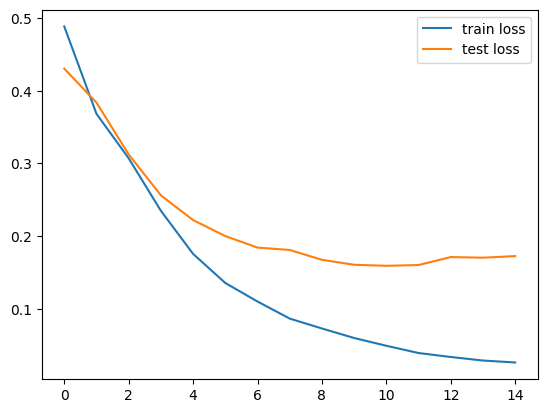

In [29]:
# Plot the train loss and test loss per iteration
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [31]:
# Accuracy

n_correct = 0.
n_total = 0.
for inputs, targets in train_iter:
  targets = targets.view(-1, 1).float()

  # Forward pass
  outputs = model(inputs)

  # Get prediction
  predictions = (outputs > 0)
  
  # update counts
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

train_acc = n_correct / n_total


n_correct = 0.
n_total = 0.
for inputs, targets in test_iter:
  targets = targets.view(-1, 1).float()

  # Forward pass
  outputs = model(inputs)

  # Get prediction
  predictions = (outputs > 0)
  
  # update counts
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

test_acc = n_correct / n_total
print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.9967, Test acc: 0.9581
